# My Spotify Data: A Brief Statistical Analysis

## Introduction

I requested my listening data from Spotify back in September, to see if I could make some fun discoveries about my streaming history. It took about a week to arrive, and the contents of my data folder were way larger in volume than I could have expected, but exciting nonetheless 

### The files

The data came mostly in JSON format, with the exception of the READMEFIRST file, which was a PDF. JSON files including Userdata.json, Payments.json, Identity.json, Identifiers.json, Followers.json, and DuoNewFamily.json all included information about my account, the email linked to it, my user data, and information about the Spotify Family plan I'm in with a couple of my friends. I will not be exploring these files in this project as they contain personal information.

The files that contain most of my interaction data are:

- StreamingHistory0.json and StreamingHistory1.json, which is my streaming history for the past year since I requested the data

- Playlist1.json which has the name and contents of my playlists at the point the data was requested 

- YourLibrary.json which includes a list of all the tracks in my library

- SearchQueries.json which includes a list of all the search queries I've made and on which platform. (while looking through this file I realized my searches are all super lazy-- most of the time I dont even finish the word I'm searching for, which is why this data won't be of much use) 

- Inferences.json which is essentially a list of assumptions Spotify has made about me as a consumer by observing my interactions. It's divided into 1p, 2p, 3p to denote whether the information is something they directly discovered (1p) or gathered from a third party affiliate (3p) This is, in my opinion the most intriguing file, although my analysis will focus on streaming history and library data.

The one I'll be unpacking in this project will be my streaming history data

#### My streaming history

In [13]:
library(jsonlite)
library(dplyr)
suppressMessages(library(dplyr, warn.conflict = FALSE, quietly = TRUE)) #dplyr was being very noisy on jupiter

#loading up my streaming history into dataframes
streamHist0 <- fromJSON('StreamingHistory0.json')
streamHist1 <- fromJSON('StreamingHistory1.json')

#combining the dataframes
streamHist <- rbind(streamHist0, streamHist1)

#let's look at them!
head(streamHist)
tail(streamHist)

endTime,artistName,trackName,msPlayed
<chr>,<chr>,<chr>,<int>
2020-09-23 18:44,The Weeknd,Hurt You,587
2020-09-24 00:02,tysu,Rainy Day,171177
2020-09-24 00:05,less.people,Enough to Go Around,155675
2020-09-24 05:12,Chris Mazuera,Perspective,99407
2020-09-24 05:15,Stray Kids,"Wow (Lee Know, Hyunjin, Felix)",193811
2020-09-24 05:18,GOT7,POISON,175602


,endTime,artistName,trackName,msPlayed
,<chr>,<chr>,<chr>,<int>
13891,2021-09-24 19:27,Taylor Swift,The Way I Loved You (Taylor’s Version),3413
13892,2021-09-24 19:27,Taylor Swift,The Way I Loved You (Taylor’s Version),1664
13893,2021-09-24 19:31,Troye Sivan,Strawberries & Cigarettes,201538
13894,2021-09-24 19:34,Arctic Monkeys,I Wanna Be Yours,183956
13895,2021-09-24 20:04,The Weeknd,Die For You,260253
13896,2021-09-24 20:07,Olivia Rodrigo,good 4 u,178146


I combined my streaming history into one dataframe. The variable information is listed on spotify

endTime - Date and time of when the stream ended in UTC format (Coordinated Universal Time zone).
    
artistName - Name of "creator" for each stream (e.g. the artist name if a music track).
    
trackName - Name of items listened to or watched (e.g. title of music track or name of video). 
    
msPlayed - Stands for how many mili-seconds the track was listened to.

# Initial Data Exploration

## Hours Listened

In [14]:
library(ggplot2)

#parses just the date played from the endTime character string variable
streamHist$endTime = as.Date(streamHist$endTime)

#convert msPlayed to seconds
streamHist$sPlayed = streamHist$msPlayed / 1000
head(streamHist)


endTime,artistName,trackName,msPlayed,sPlayed
<date>,<chr>,<chr>,<int>,<dbl>
2020-09-23,The Weeknd,Hurt You,587,0.587
2020-09-24,tysu,Rainy Day,171177,171.177
2020-09-24,less.people,Enough to Go Around,155675,155.675
2020-09-24,Chris Mazuera,Perspective,99407,99.407
2020-09-24,Stray Kids,"Wow (Lee Know, Hyunjin, Felix)",193811,193.811
2020-09-24,GOT7,POISON,175602,175.602


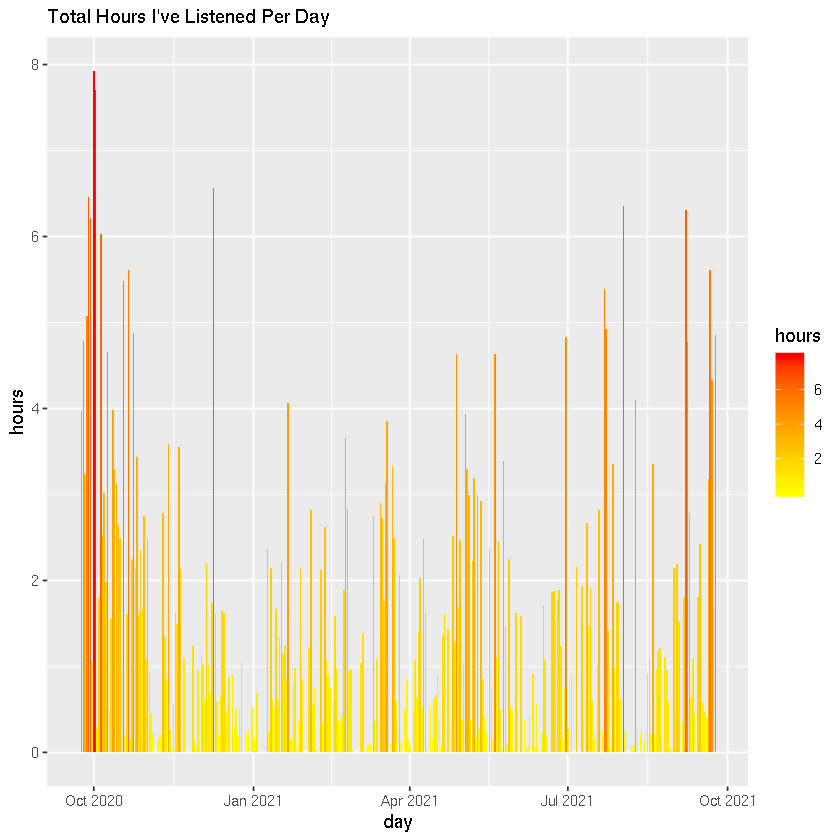

In [15]:
library(ggplot2)

#sums time listened per Day by seconds, converts into hours
timeListenedPerDay = aggregate(streamHist$sPlayed, by=list(streamHist$endTime), sum)
colnames(timeListenedPerDay) = c("day", "seconds")
timeListenedPerDay$hours = timeListenedPerDay$seconds / 3600

#plots it
ggplot(data=timeListenedPerDay, aes(x=day, y=hours)) +
  geom_bar(stat="identity") + 
  geom_col(aes(fill = hours)) +
  scale_fill_gradient(low = "yellow", high = "red") +
  ggtitle("Total Hours I've Listened Per Day")


This is a simple but useless barplot of the number of hours I listened every day for a year. There seems to be no correlation or seasonality from my listening patterns, which makes sense because my listening around the year was sporadic, depending on my mood.

week,seconds,hours
<date>,<dbl>,<dbl>
2020-09-20,43131.09,11.98086
2020-09-27,124947.35,34.70760
2020-10-04,73821.28,20.50591
2020-10-11,65051.43,18.06984
2020-10-18,72669.61,20.18600
2020-10-25,54137.32,15.03814


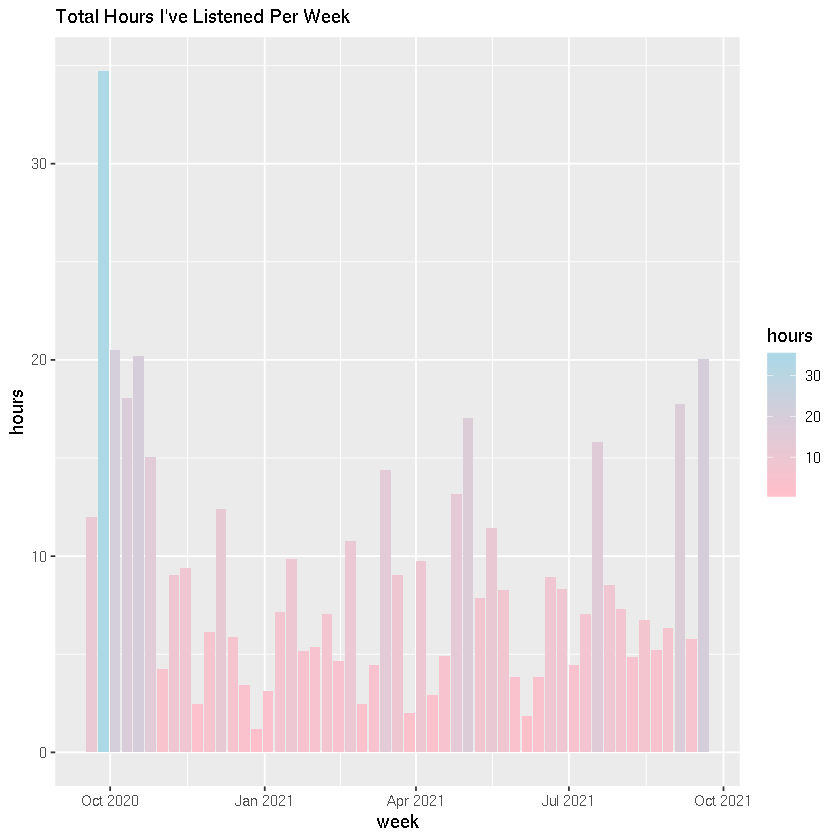

In [16]:
#let's do this again, but by week
byweek = lubridate::floor_date(timeListenedPerDay$day, "week")
timeListenedPerWeek = aggregate(timeListenedPerDay$seconds, 
    by=list(byweek), sum)
colnames(timeListenedPerWeek) = c("week", "seconds")
timeListenedPerWeek$hours = timeListenedPerWeek$seconds / 3600
head(timeListenedPerWeek)
ggplot(data=timeListenedPerWeek, aes(x=week, y=hours)) +
  geom_bar(stat="identity") +
  geom_col(aes(fill = hours)) +
  scale_fill_gradient(low = "pink", high = "light blue") +
  ggtitle("Total Hours I've Listened Per Week")

month,seconds,hours
<date>,<dbl>,<dbl>
2020-09-01,110793.30,30.77592
2020-10-01,322964.78,89.71244
2020-11-01,94292.94,26.19248
2020-12-01,100292.29,27.85897
2021-01-01,91567.66,25.43546
2021-02-01,100086.20,27.80172


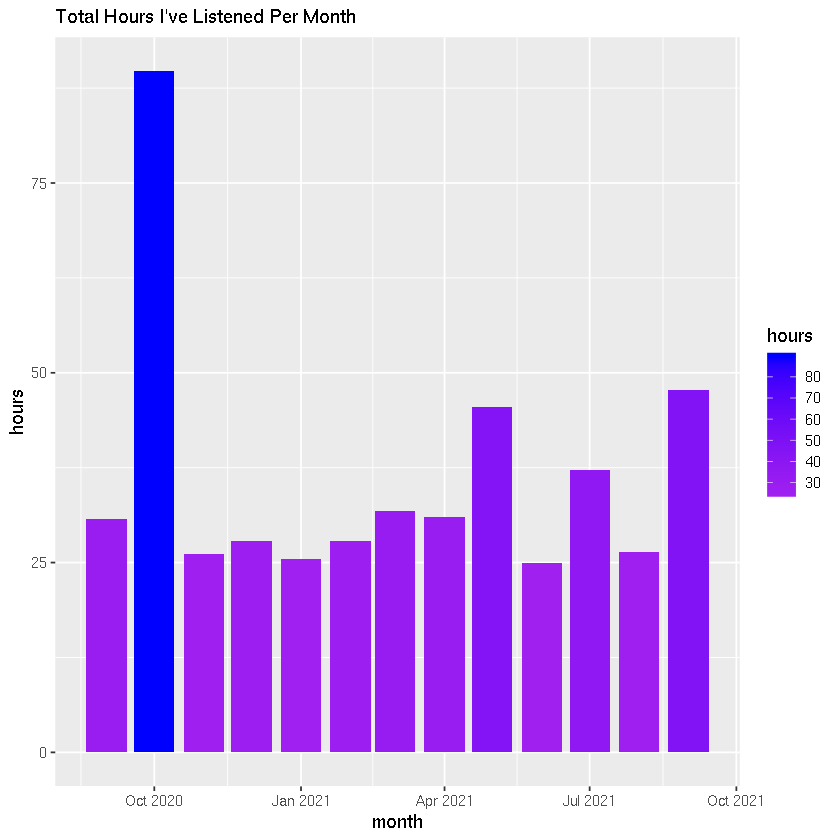

In [17]:
#let's do this again, but by month

bymonth = lubridate::floor_date(timeListenedPerDay$day, "month")
timeListenedPerMonth = aggregate(timeListenedPerDay$seconds, 
    by=list(bymonth), sum)
colnames(timeListenedPerMonth) = c("month", "seconds")
timeListenedPerMonth$hours = timeListenedPerMonth$seconds / 3600
head(timeListenedPerMonth)
ggplot(data=timeListenedPerMonth, aes(x=month, y=hours)) +
  geom_bar(stat="identity") +
  geom_col(aes(fill = hours)) +
  scale_fill_gradient(low = "purple", high = "blue") +
  ggtitle("Total Hours I've Listened Per Month")


The week and the month models were way more useful to look at, than the day one. Although the day model is really fun to look at to take in the sheer volume of data collected, it really doesnt provide much useful information, and I think it's a classic example of information overload.

I think it's important to mention that around July 2021 I went from spotify's free listening plan to a spotify premium family plan, but it didn't seeem to have much impact on my listening.

## Top artists and tracks

I had a feeling that spotify wrapped wasn't wholly accurate, so I wanted to go ahead and find my top artists for the past year.

endTime,artistName,trackName,msPlayed,sPlayed,mPlayed
<date>,<chr>,<chr>,<int>,<dbl>,<dbl>
2020-09-23,The Weeknd,Hurt You,587,0.587,0.009783333
2020-09-24,tysu,Rainy Day,171177,171.177,2.852950000
2020-09-24,less.people,Enough to Go Around,155675,155.675,2.594583333
2020-09-24,Chris Mazuera,Perspective,99407,99.407,1.656783333
2020-09-24,Stray Kids,"Wow (Lee Know, Hyunjin, Felix)",193811,193.811,3.230183333
2020-09-24,GOT7,POISON,175602,175.602,2.926700000


artistName,mPlayed
<chr>,<dbl>
88rising,480.8446
Arctic Monkeys,947.3979
Billie Eilish,479.3954
BROCKHAMPTON,354.5530
BTS,1056.2115
Doja Cat,474.0848


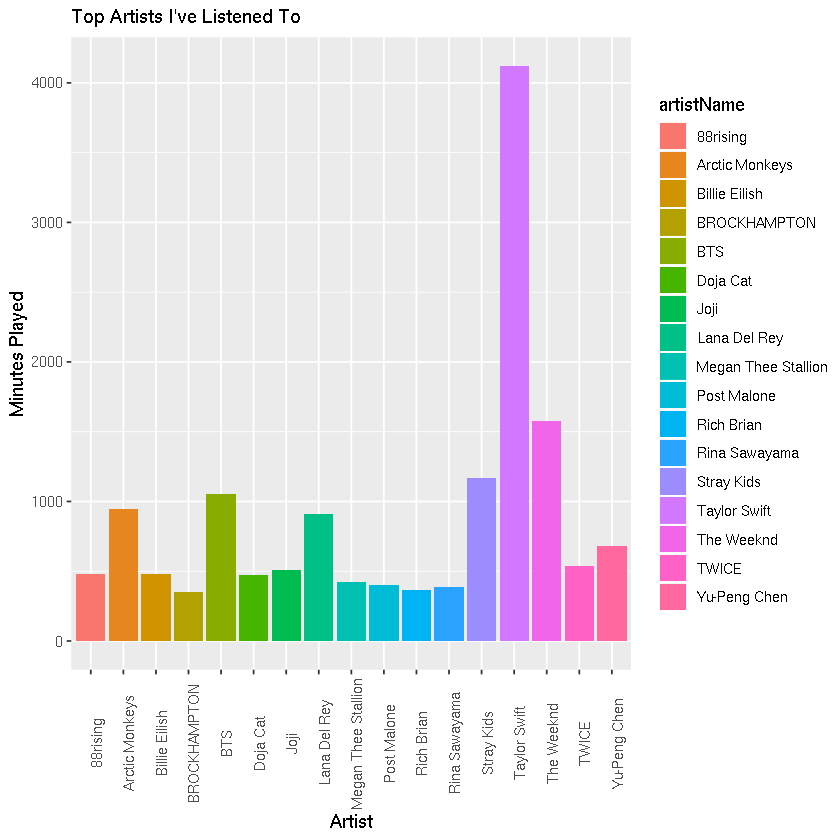

In [18]:
#add a minutes listened column to streamHist 
streamHist$mPlayed = streamHist$sPlayed / 60
head(streamHist)

#gets the artists who I've spent the most time listening to into a df
minutesMostListened = streamHist %>%
    group_by(artistName) %>%
    summarize(mPlayed = sum(mPlayed)) %>% 
    filter(mPlayed >= 300)
head(minutesMostListened)

#yay let's plot
ggplot(data=minutesMostListened, aes(x=artistName, y=mPlayed)) +
  geom_bar(stat="identity") +
  geom_col(aes(fill = artistName)) +
  labs(x="Artist", y="Minutes Played")+
  theme(axis.text.x = element_text(angle = 90))+ 
  ggtitle("Top Artists I've Listened To")


This is almost exactly in line with my Spotify wrapped from last year. The slight differences are because spotify's ranking algorithm has a few more attributes in it; they also look at how many songs you've saved or added to a playlist, which I am not currently observing.

<div>
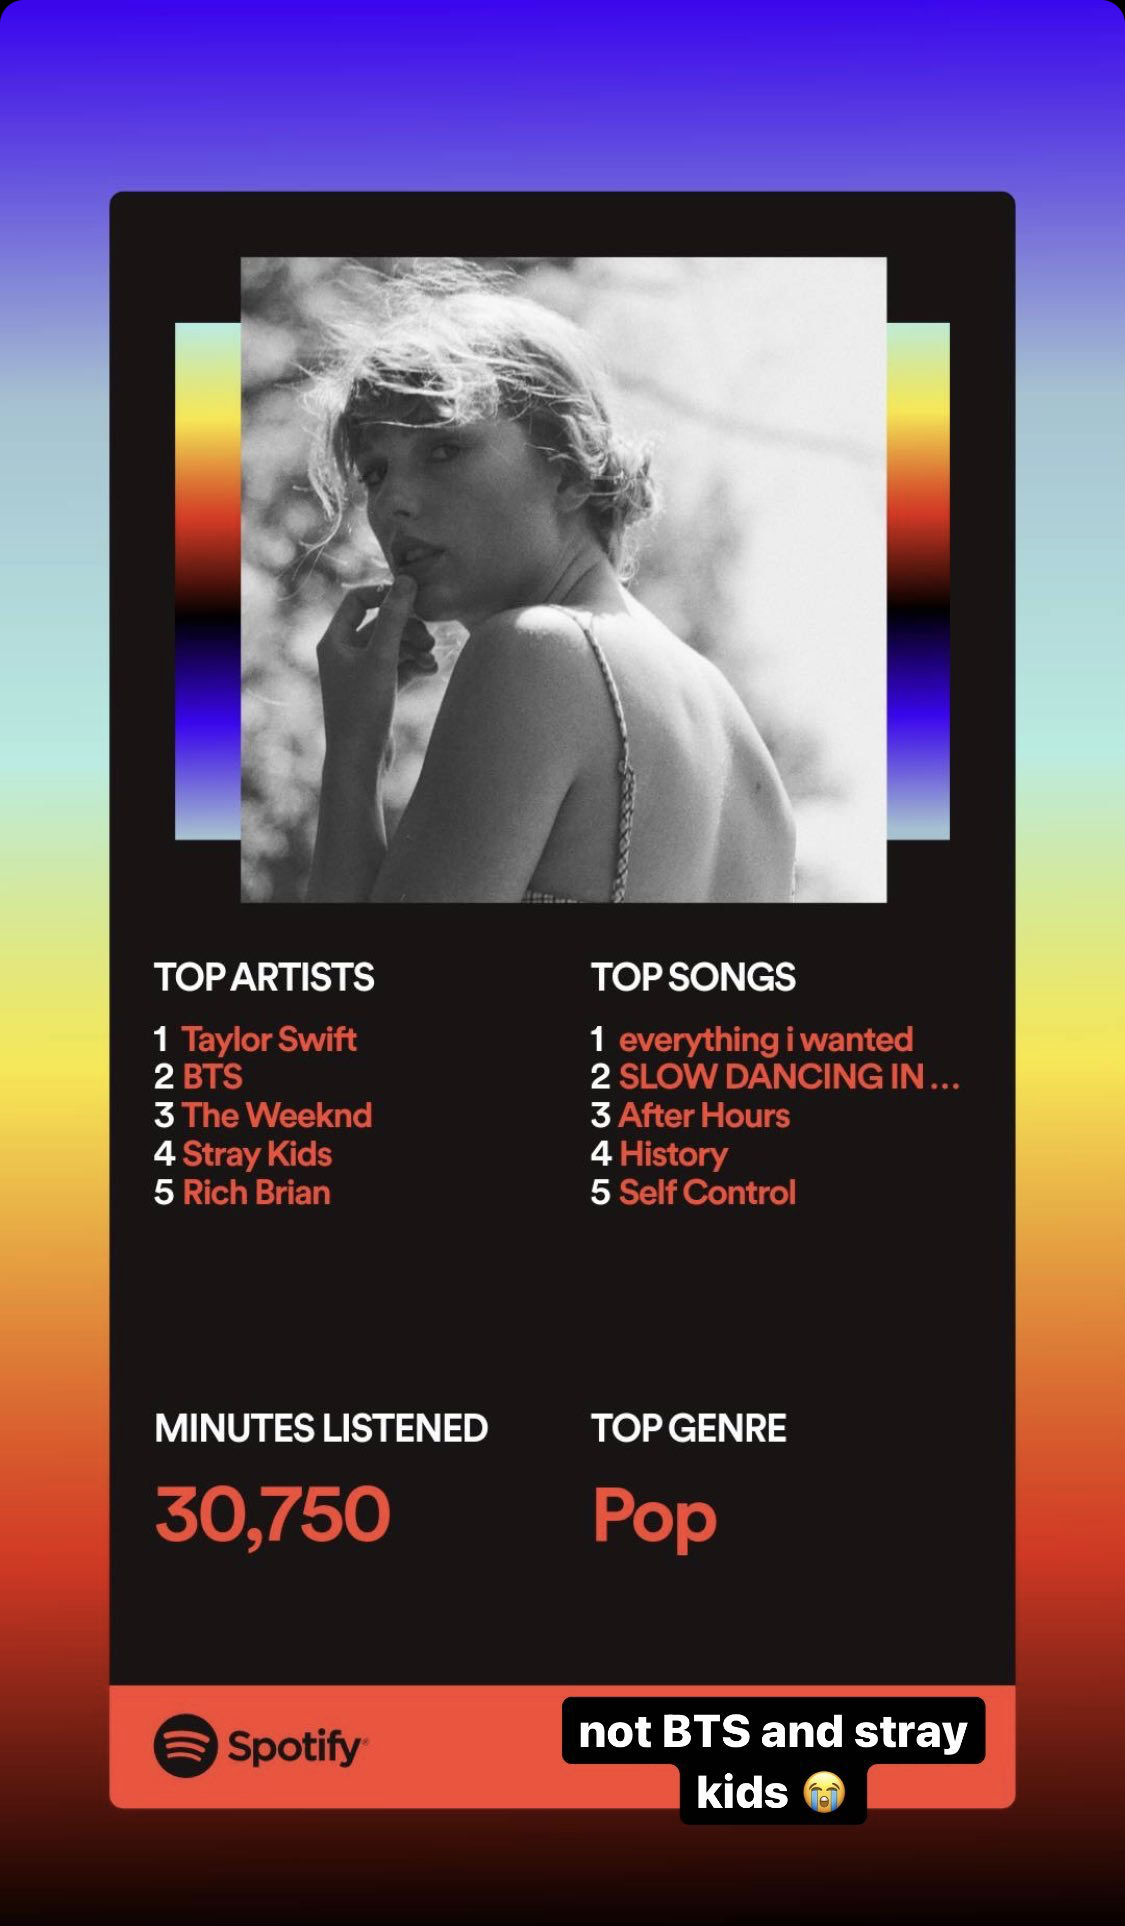
</div>

This is a pretty significant plot of all the artists I've listened to for the past year. Looks pretty cool, pretty obvious that I have a favorite artist. Now for top tracks.

trackName,mPlayed
<chr>,<dbl>
505,169.9232
After Hours,198.5894
champagne problems,195.9742
Circles,259.3562
coney island (feat. The National),131.7532
Die For You,175.9710


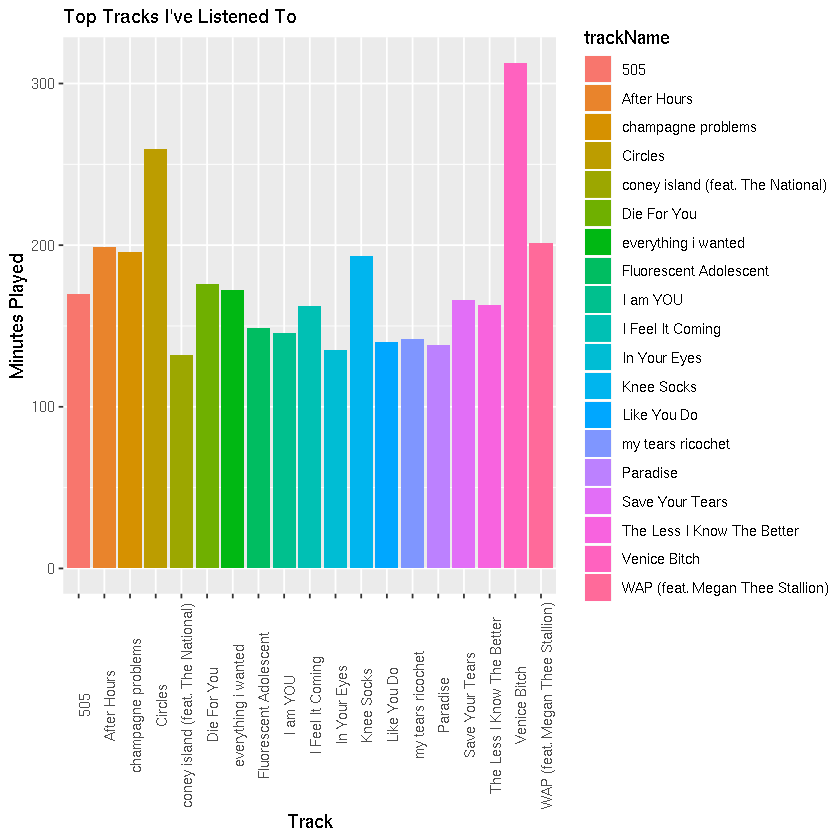

In [19]:
#gets tracks that I've spent the most time listening to into a df 
tracksMostListened = streamHist %>%
    group_by(trackName) %>%
    summarize(mPlayed = sum(mPlayed)) %>% 
    filter(mPlayed >= 130)
head(tracksMostListened)

#let's plot that
ggplot(data=tracksMostListened, aes(x=trackName, y=mPlayed)) +
  geom_bar(stat="identity") +
  geom_col(aes(fill = trackName)) +
  labs(x="Track", y="Minutes Played")+
  theme(axis.text.x = element_text(angle = 90))+ 
  ggtitle("Top Tracks I've Listened To")

A noteworthy observation about this is that the song Venice Bitch by Lana Del Rey is significantly longer than all other songs; this means that this doesn't exactly show the tracks I've most frequently listened to, rather the tracks I've listened to for the longest time. This puts tracks like MONTERO by Lil Nas X— which is shorter than the average pop song— at a disadvantage.  

track,frequency
<fct>,<int>
? (Who Do You Think Of),1
.,1
...Baby One More Time,2
...off,2
...Ready For It?,6
...Ready For It? - BloodPop® Remix,4


track,frequency
<fct>,<int>
505,55
After Hours,43
California (feat. Warren Hue),56
champagne problems,57
Circles,100
cold/mess,45


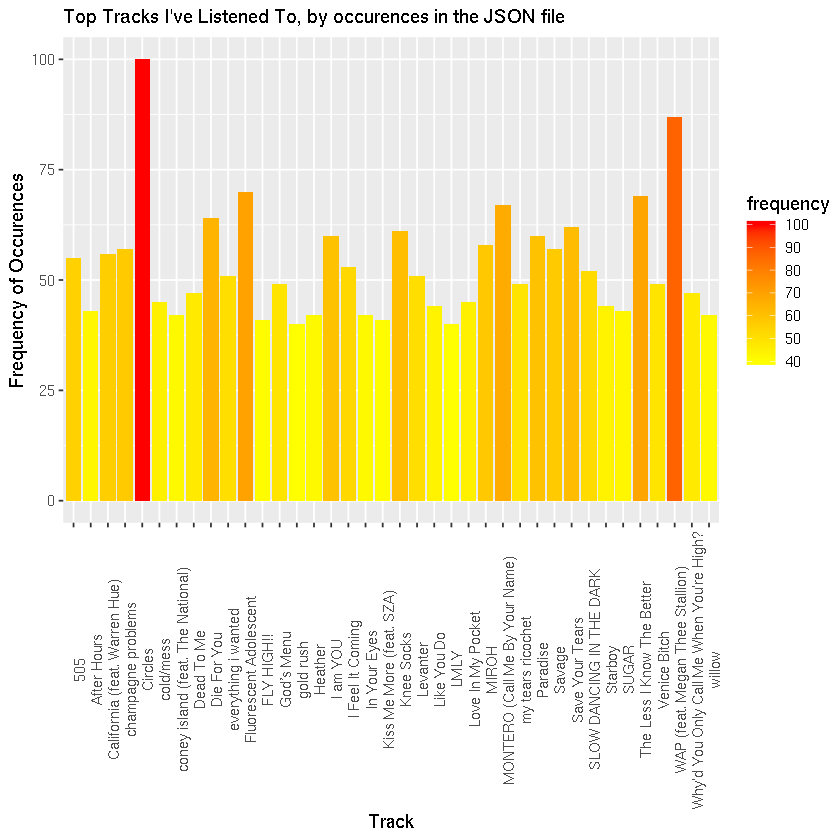

In [20]:
#let's try that again but sort by occurences in streaming history instead
numberOfSongStreams = as.data.frame(table(streamHist$trackName)) 
colnames(numberOfSongStreams) = c("track", "frequency")
head(numberOfSongStreams)
significantSongs = filter(numberOfSongStreams, numberOfSongStreams$frequency >= 40)
head(significantSongs)

ggplot(data=significantSongs, aes(x=track, y=frequency)) +
  geom_bar(stat="identity") +
  geom_col(aes(fill = frequency)) +
  scale_fill_gradient(low="yellow", high="red") +
  labs(x="Track", y="Frequency of Occurences")+
  theme(axis.text.x = element_text(angle = 90))+ 
  ggtitle("Top Tracks I've Listened To, by occurences in the JSON file")


This is also a slightly flawed model because even if the song was played for a few miliseconds, it is still counted, which means it just counts the number of times the song came on shuffle and takes shuffle into account for how many times a song was played. In the data, Spotify doesn't provide total track length, so there's nothing to compare it to. If track length was provided then I could total up the amount of time I played the track for and divide it by the length to find the exact number of times I played the song. Since that information isn't available, I went with the two second best options, tracking how long I listened to each song for, and how many times each track occured in my listening history. Each method comes with its flaws.

## Conclusion

This data exploration helped me get a feel for where I can go and how much I can do with my data. Sometimes, measures are slightly flawed (for example, finding most played tracks) However, this data serves as a pretty good model for how much I use spotify. Which leads us to the core portion of the project.

# Statistical Analysis

The three questions I will be posing are as follows: 

- My listening was different in September 2020 than all of the other months. Is there is a significant statistical difference between my mean listening time for all months in my data?

- My top artist is Taylor Swift. Is there a statistically significant difference between the proportion of time I listened to her when she released her album Evermore (December 2020) to when she re-released her album Fearless (April 2021)?

- In the month of May 2021, is there a statistically significant difference between the proportion of time I listened to Arctic Monkeys and The Weeknd?

## Question 1

My listening was different in September 2020 than all of the other months. Is there is a significant statistical difference between my mean listening time for all months in my data?

For this I will be doing ANOVA. ANOVA is a one way analysis test to determine whether there is statistical significance between the means of 3 or more different independent groups. This test is an important set up to be able to trace seasonality in data. A predictable fluctuation within my listening data can be used to make important assumptions about me as a listener and consumer of the music streaming service.

I'll be using the timeListenedPerDay dataframe and take an average for every month. This will only involve a brief change in the data I presented earlier.

day,seconds,hours
<date>,<dbl>,<dbl>
2020-09-23,0.587,0.0001630556
2020-09-24,14281.557,3.9670991667
2020-09-25,17205.187,4.7792186111
2020-09-26,11643.761,3.2343780556
2020-09-27,18278.513,5.0773647222
2020-09-28,23246.437,6.4573436111


month,hours
<date>,<dbl>
2020-09-01,3.8469895
2020-10-01,2.8939497
2020-11-01,1.1388037
2020-12-01,0.9949632
2021-01-01,0.9782870
2021-02-01,1.2087706


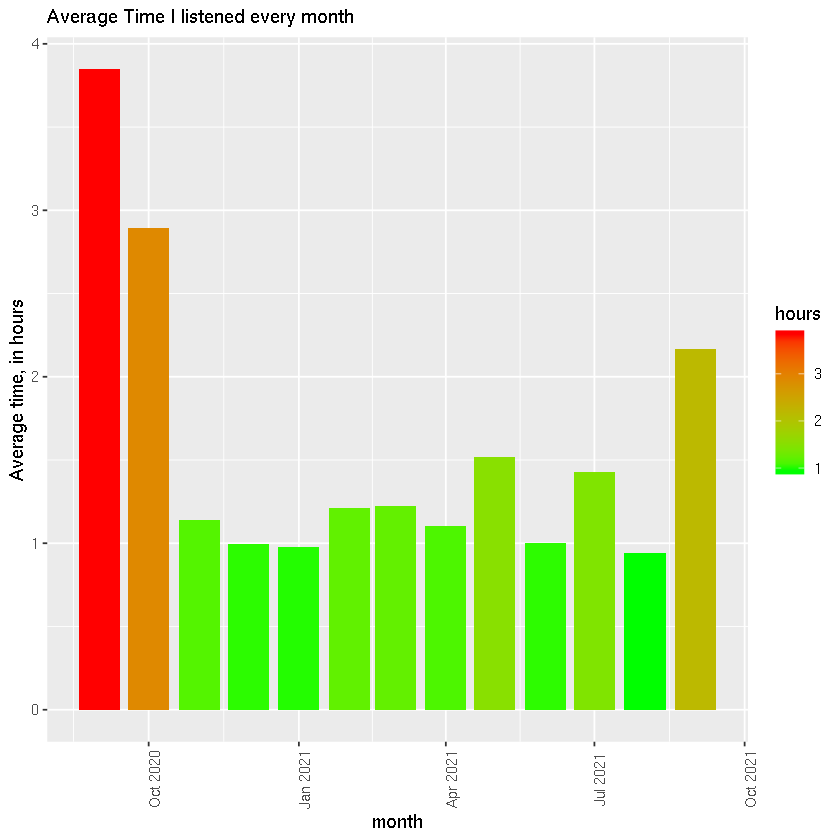

In [21]:
#a referesher of what the timeListenedPerDay dataframe looked like
head(timeListenedPerDay)
bymonth2 = lubridate::floor_date(timeListenedPerDay$day, "month")

#instead of aggregating by total number of hours, this time I did mean
avgTimeListenedPerMonth = aggregate(timeListenedPerDay$hours, 
    by=list(bymonth2), mean)
colnames(avgTimeListenedPerMonth) = c("month", "hours")
head(avgTimeListenedPerMonth)

#now let's plot this real quick
ggplot(data=avgTimeListenedPerMonth, aes(x=month, y=hours)) +
  geom_bar(stat="identity") +
  geom_col(aes(fill = hours)) +
  scale_fill_gradient(low="green", high="red") +
  labs(x="month", y="Average time, in hours")+
  theme(axis.text.x = element_text(angle = 90))+ 
  ggtitle("Average Time I listened every month")

Now that we have a plot, there looks like there is a pretty obvious difference between the means of each of some of these months, namely September 2020, October 2021, May 2021, and September 2021. Let's see if there is a statistical difference using an ANOVA test.

1 Independent variable - month

1 Dependent variable - hours

The null hypothesis states that any deviation of the mean for any month is purely by chance. The differences are statistically negligible.

The alternate hypothesis states that any difference in means is statistically important. 

The alpha value is 0.05

This test's assumptions:

- the data is normally distributed

- observations are independent of each other

- variance is approximately equal

In [22]:
aovtest = aov(month~hours, data=avgTimeListenedPerMonth)
summary(aovtest)

            Df Sum Sq Mean Sq F value Pr(>F)
hours        1  30725   30725   2.469  0.144
Residuals   11 136882   12444               

### Conclusion

Although there seemed like a pretty big statistical difference for the months of September 2020, October 2021, May 2021, and September 2021, since the P-value is greater than alpha=0.05, the difference is implied to be negligible. We accept the null hypothesis.

#### The conclusion's implications

Although we accepted the null hypothesis and conculeded that there is no major statistical difference between the means presented in the data. This implies that there is no seasonality to my listening as a consumer of the streaming service. This knowledge is extremely important to spotify's business model. The Inferences JSON file that I brought up earlier functions best as a source of targetted ad information, and also as an aggregation of data when there isn't dramatic seasonality in my listening. In other words, I will always be listening, so they have more leeway with the ads they decide to show me.

## Question 2

My top artist is Taylor Swift. Is there a statistically significant difference between the proportion of time I listened to her when she released her album Evermore (December 2020) to when she re-released her album Fearless (April 2021) 

For this I will be doing a 2 prop z test for equality. I am testing to see whether the proportion of time I listened to Taylor Swift in December 2020, when she dropped Evermore, is greater than the proportion of time I listened to Taylor Swift in April 2021, when she dropped Fearless.

Null hypothesis is that any difference between the two proportions is purely by chance 

Alternative hypothesis is that the proportion of time I listened to Taylor in December > the proportion of time I listned to Taylor in April.

my alpha level is 0.05

assume the sample size is large enough to be normally distributed.

assume both samples are independent of each other.

In [23]:
#add a total time in minutes
timeListenedPerMonth$minutes = timeListenedPerMonth$seconds /60
head(timeListenedPerMonth)

taylor = streamHist %>% filter(artistName == "Taylor Swift") 
head(taylor)

taylorTimePerDay = aggregate(taylor$sPlayed, by=list(taylor$endTime), sum)
colnames(taylorTimePerDay) = c("day", "seconds")
taylorTimePerDay$minutes = taylorTimePerDay$seconds / 60

head(taylorTimePerDay)

taylorbymonth = lubridate::floor_date(taylorTimePerDay$day, "month")
taylorTimeListenedPerMonth = aggregate(taylorTimePerDay$minutes, by=list(taylorbymonth), sum)
colnames(taylorTimeListenedPerMonth) = c("month", "minutes")
head(taylorTimeListenedPerMonth)

totalTimeDec2020 = timeListenedPerMonth %>% filter(month == as.Date("2020-12-01"))
totalTaylorTimeDec2020 = taylorTimeListenedPerMonth %>% filter(month == as.Date("2020-12-01"))


totalTimeApr2020 = timeListenedPerMonth %>% filter(month == as.Date("2021-04-01"))
totalTaylorTimeApr2020 = taylorTimeListenedPerMonth %>% filter(month == as.Date("2021-04-01"))

result <- prop.test(x = c(as.double(totalTaylorTimeDec2020$minutes), as.double(totalTaylorTimeApr2020$minutes)), 
                    n = c(as.double(totalTimeDec2020$minutes), as.double(totalTimeApr2020$minutes)), 
                    alternative = "greater")
result

month,seconds,hours,minutes
<date>,<dbl>,<dbl>,<dbl>
2020-09-01,110793.30,30.77592,1846.555
2020-10-01,322964.78,89.71244,5382.746
2020-11-01,94292.94,26.19248,1571.549
2020-12-01,100292.29,27.85897,1671.538
2021-01-01,91567.66,25.43546,1526.128
2021-02-01,100086.20,27.80172,1668.103


endTime,artistName,trackName,msPlayed,sPlayed,mPlayed
<date>,<chr>,<chr>,<int>,<dbl>,<dbl>
2020-09-24,Taylor Swift,my tears ricochet,255893,255.893,4.264883
2020-09-25,Taylor Swift,the lakes - bonus track,211813,211.813,3.530217
2020-09-25,Taylor Swift,my tears ricochet,255893,255.893,4.264883
2020-09-25,Taylor Swift,my tears ricochet,255893,255.893,4.264883
2020-09-25,Taylor Swift,the lakes - bonus track,211813,211.813,3.530217
2020-09-25,Taylor Swift,my tears ricochet,255893,255.893,4.264883


day,seconds,minutes
<date>,<dbl>,<dbl>
2020-09-24,255.893,4.264883
2020-09-25,1191.305,19.855083
2020-09-26,212.708,3.545133
2020-09-27,2230.911,37.181850
2020-09-28,2964.784,49.413067
2020-09-29,1232.540,20.542333


month,minutes
<date>,<dbl>
2020-09-01,134.80235
2020-10-01,458.38633
2020-11-01,27.25675
2020-12-01,326.05940
2021-01-01,446.93668
2021-02-01,602.92883



	2-sample test for equality of proportions with continuity correction

data:  c(as.double(totalTaylorTimeDec2020$minutes), as.double(totalTaylorTimeApr2020$minutes)) out of c(as.double(totalTimeDec2020$minutes), as.double(totalTimeApr2020$minutes))
X-squared = 39.957, df = 1, p-value = 1.298e-10
alternative hypothesis: greater
95 percent confidence interval:
 0.05684741 1.00000000
sample estimates:
   prop 1    prop 2 
0.1950655 0.1175193 


### Conclusion

Since the p value is less than alpha, reject the null hypothesis. The proportion of time I listened to Taylor in December > The proportion of time I listened to Taylor in April.

#### The conclusion's implications

Although this was already somewhat implied—of course I would listen to Taylor Swift more when she drops a new  album versus an older rerecorded album— it's important to gain insight that is backed by statistical evidence. In the last example, although it was fairly obvious that there was a difference between some of the means, the ANOVA test indicated that any difference in means has a high probability of being statistically negligible. Having this kind of information can be very important in terms of marketing an artist, or companion services that go well with an album drop, one example would be Taylor Swift merch marketing through targetted ads, depending on which album the user tends to prefer.

## Question 3

Is there a statistically significant difference between the proportion of time I listened to Arctic Monkeys in August 2021 and The Weeknd in May 2021?

This will also require a two prop z test, because we are comparing two proportions, Arctic monkeys to total august listening time, and The Weekend to may listening time. I just want to do this test out of sheer curiosity.

Null hypothesis is that any difference between the two proportions is purely by chance

Alternative hypothesis is that the proportion of time I listened to Arctic Monkeys != the proportion of time I listned to The Weeknd in May.

my alpha level is 0.05

assume the sample size is large enough to be normally distributed.

assume both samples are independent of each other.

In [24]:
head(timeListenedPerMonth)

weeknd = streamHist %>% filter(artistName == "The Weeknd") 
head(weeknd)

am = streamHist %>% filter(artistName == "Arctic Monkeys") 
head(am)

weekndTimePerDay = aggregate(weeknd$sPlayed, by=list(weeknd$endTime), sum)
colnames(weekndTimePerDay) = c("day", "seconds")
weekndTimePerDay$minutes = weekndTimePerDay$seconds / 60

head(weekndTimePerDay)

amTimePerDay = aggregate(am$sPlayed, by=list(am$endTime), sum)
colnames(amTimePerDay) = c("day", "seconds")
amTimePerDay$minutes = amTimePerDay$seconds / 60

head(amTimePerDay)


weekndbymonth = lubridate::floor_date(weekndTimePerDay$day, "month")
weekndTimeListenedPerMonth = aggregate(weekndTimePerDay$minutes, by=list(weekndbymonth), sum)
colnames(weekndTimeListenedPerMonth) = c("month", "minutes")
head(weekndTimeListenedPerMonth)

ambymonth = lubridate::floor_date(amTimePerDay$day, "month")
amTimeListenedPerMonth = aggregate(amTimePerDay$minutes, by=list(ambymonth), sum)
colnames(amTimeListenedPerMonth) = c("month", "minutes")
head(amTimeListenedPerMonth)

totalTimeMay2021 = timeListenedPerMonth %>% filter(month == as.Date("2021-05-01"))
totalWeekndTimeMay2021 = weekndTimeListenedPerMonth %>% filter(month == as.Date("2021-05-01"))

totalTimeAug2021 = timeListenedPerMonth %>% filter(month == as.Date("2021-08-01"))
totalAmTimeAug2021 = amTimeListenedPerMonth %>% filter(month == as.Date("2021-08-01"))


result <- prop.test(x = c(as.double(totalWeekndTimeMay2021$minutes), as.double(totalAmTimeAug2021$minutes)), 
                    n = c(as.double(totalTimeMay2021$minutes), as.double(totalTimeAug2021$minutes)))
result


month,seconds,hours,minutes
<date>,<dbl>,<dbl>,<dbl>
2020-09-01,110793.30,30.77592,1846.555
2020-10-01,322964.78,89.71244,5382.746
2020-11-01,94292.94,26.19248,1571.549
2020-12-01,100292.29,27.85897,1671.538
2021-01-01,91567.66,25.43546,1526.128
2021-02-01,100086.20,27.80172,1668.103


endTime,artistName,trackName,msPlayed,sPlayed,mPlayed
<date>,<chr>,<chr>,<int>,<dbl>,<dbl>
2020-09-23,The Weeknd,Hurt You,587,0.587,0.009783333
2020-09-24,The Weeknd,After Hours,222218,222.218,3.703633333
2020-09-24,The Weeknd,Starboy,230453,230.453,3.840883333
2020-09-25,The Weeknd,King Of The Fall,18186,18.186,0.303100000
2020-09-25,The Weeknd,King Of The Fall,301594,301.594,5.026566667
2020-09-25,The Weeknd,Final Lullaby - Bonus Track,33901,33.901,0.565016667


endTime,artistName,trackName,msPlayed,sPlayed,mPlayed
<date>,<chr>,<chr>,<int>,<dbl>,<dbl>
2020-09-24,Arctic Monkeys,505,253586,253.586,4.226433
2020-09-25,Arctic Monkeys,Fluorescent Adolescent,173493,173.493,2.891550
2020-09-26,Arctic Monkeys,Fluorescent Adolescent,181194,181.194,3.019900
2020-09-26,Arctic Monkeys,Only Ones Who Know,181480,181.480,3.024667
2020-09-27,Arctic Monkeys,Fluorescent Adolescent,173493,173.493,2.891550
2020-09-28,Arctic Monkeys,Only Ones Who Know,181480,181.480,3.024667


day,seconds,minutes
<date>,<dbl>,<dbl>
2020-09-23,0.587,0.009783333
2020-09-24,452.671,7.544516667
2020-09-25,1308.856,21.814266667
2020-09-26,1214.400,20.240000000
2020-09-27,2135.431,35.590516667
2020-09-28,985.166,16.419433333


day,seconds,minutes
<date>,<dbl>,<dbl>
2020-09-24,253.586,4.226433
2020-09-25,173.493,2.891550
2020-09-26,362.674,6.044567
2020-09-27,173.493,2.891550
2020-09-28,354.973,5.916217
2020-09-29,358.910,5.981833


month,minutes
<date>,<dbl>
2020-09-01,160.43548
2020-10-01,420.74923
2020-11-01,78.51045
2020-12-01,84.21820
2021-01-01,20.09458
2021-02-01,76.41042


month,minutes
<date>,<dbl>
2020-09-01,27.95215
2020-10-01,22.12207
2020-11-01,2.89155
2020-12-01,0.79110
2021-01-01,8.98070
2021-02-01,143.43223



	2-sample test for equality of proportions with continuity correction

data:  c(as.double(totalWeekndTimeMay2021$minutes), as.double(totalAmTimeAug2021$minutes)) out of c(as.double(totalTimeMay2021$minutes), as.double(totalTimeAug2021$minutes))
X-squared = 0.64311, df = 1, p-value = 0.4226
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.008780994  0.022218845
sample estimates:
    prop 1     prop 2 
0.06681158 0.06009266 


Since the p value is way greater than 0.05 we accept the null hypothesis. Any difference between the proportion of time I spent listening to The Weekend in May 2021 and the proportion of time I spent listening to Arctic Monkeys in August 2021 is statistically negligible.

#### This conclusion's implications

Unlike the other two, this doesn't have any big implications on my patterns as a consumer, and it doesn't mean much to the company either. I just made a silly prediction that the proportion of time I spent listening to Arctic Monkeys in August will be comporable to the proportion of time I spent listening to the Weeknd in May, and it turned out to be correct. This result just soldified my prediction of my own listening patterns.

# Overall Conclusion

I learned a lot of things through this project, with the most important being the importance of truly understanding the data you're working with. Without the initial exploration— which I had considered less important than the statistical analysis— I would've missed out on so many intricacies within the data such as the way track occurences are counted, the way everything is logged. Even though I could have done a simple head function for each of the datasets I'm dealing with, it would not have nearly been enough to get a good understanding of the data at hand. 

Additionally, not all data sets accomodate certain types of hypothesis tests. This is especially important because going into this I thought a good data set has to be able to accommodate every single type of hypothesis test, which, now that I think about it doesn't really make sense in terms of real world datasets.